In [1]:
import os
os.chdir('C:\\Users\\george\\Desktop\\GitHub\\Projects\\Comtrade_Network\\')

In [4]:
import pandas as pd
import numpy as np
from Functions import tradeNetworkFunctions as tnf
from VaccinesTradeNetworkClass import VaccinesTradeNetwork
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_location = 'C:\\Users\\george\\Desktop\\GitHub\\Projects\\Comtrade_Network\\Merged_CSVs\\Comtrade_Vacciness_Data_2018'

maindf = pd.read_csv(csv_file_location, delimiter=',',
                     header=[0], encoding='utf-8')

useful_features_ls = ['Period', 'Reporter Code', 'Reporter', 'Partner Code',
                      'Partner', 'Trade Flow', 'Commodity', 'Netweight (kg)',
                      'Trade Value (US$)']
df = maindf[useful_features_ls]


df.groupby(['Reporter']).size()
df.groupby(['Partner']).size()

df['Trade Flow'].unique()

trade_flow_dict = {'Re-imports':'Imports', 
                   'Re-exports':'Exports',
                   'Imports':'Imports', 
                   'Exports':'Exports'}

df['Trade Flow'] = df['Trade Flow'].map(trade_flow_dict)

df = df[df.Partner != 'World']

df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

network_df = df.groupby(['Reporter','Partner','Trade Flow']).agg(
        {'Trade Value (US$)':'sum','Netweight (kg)':'sum'}).reset_index()

# Here we will introduce a new feature which is the Price/Kg.
network_df['Value_Per_Kg'] = network_df['Trade Value (US$)']/network_df['Netweight (kg)']
network_df['Value_Per_Kg'].replace([np.inf, -np.inf], 0, inplace=True)

top_exporters = tnf.getAggStatistics(df, feature='Trade Value (US$)',
                                     kind='Exports', year = '2018')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
top_exporters = top_exporters[0:10]

In [7]:
import plotly.express as px
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
fig = px.bar(data_canada, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [9]:
import networkx as nx
import plotly.graph_objects as go


greece = VaccinesTradeNetwork(network_df, country='Greece')

G = greece.generateCountryGraph(tradeflow='Imports', source='Reporter',
                            target='Partner', agg=True)

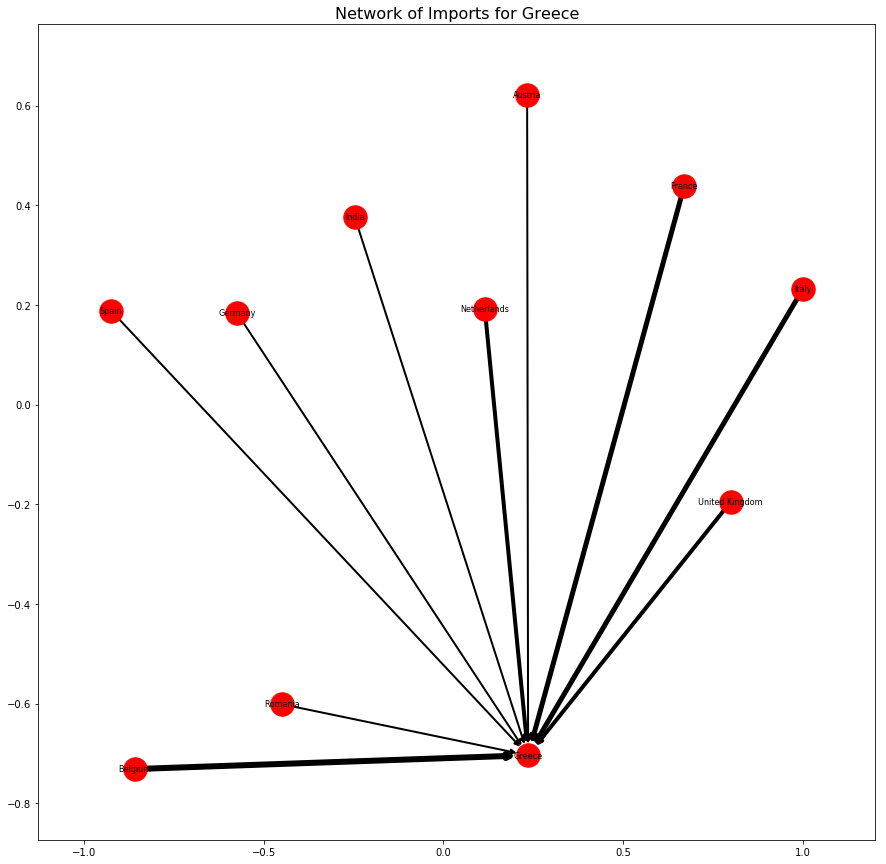

In [10]:
greece.plotCountryGraph()

In [11]:
pos = nx.layout.spring_layout(G)

In [12]:
pos

{'Austria': array([-0.47026116,  1.        ]),
 'Belgium': array([-0.86768805,  0.11298914]),
 'France': array([-0.240484  , -0.88342361]),
 'Germany': array([-0.51645577,  0.57383357]),
 'Greece': array([0.39345109, 0.4106929 ]),
 'India': array([ 0.27192029, -0.43566758]),
 'Italy': array([ 0.93581103, -0.34218753]),
 'Netherlands': array([-0.29366903, -0.11318382]),
 'Romania': array([-0.73068639, -0.5490119 ]),
 'Spain': array([ 0.69494203, -0.74191102]),
 'United Kingdom': array([0.82311996, 0.96786986])}

In [13]:
edge_x = []
edge_y = []
node_trade_values = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    print(edge)
    print(G.edges[edge]['Trade Value (US$)'])
    node_trade_values.append(G.edges[edge]['Trade Value (US$)'])

('Austria', 'Greece')
1581177
('Belgium', 'Greece')
52720931
('France', 'Greece')
42113155
('Germany', 'Greece')
864
('India', 'Greece')
499997
('Italy', 'Greece')
38857345
('Netherlands', 'Greece')
32086808
('Romania', 'Greece')
82
('Spain', 'Greece')
3095626
('United Kingdom', 'Greece')
25908281


In [14]:
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='text',
    mode='lines')

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    

In [15]:
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Viridis',
        reversescale=True,
        color=[],
        size=12,
        colorbar=dict(
            thickness=15,
            title='Trade Value (US$)',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [16]:
node_trace.marker.color = node_trade_values
node_trace.text = node_text

country = 'Greece'

In [17]:
node_trade_values


[1581177,
 52720931,
 42113155,
 864,
 499997,
 38857345,
 32086808,
 82,
 3095626,
 25908281]

In [18]:
node_text

['Greece',
 'Austria',
 'Belgium',
 'France',
 'Germany',
 'India',
 'Italy',
 'Netherlands',
 'Romania',
 'Spain',
 'United Kingdom']

In [20]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title=f'<br>Imports Network of {country} for Human Vaccines',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()